In [2]:
## Q1. Install and load the latest versions of TensorFlow and Keras. Print their versions.

## Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
import os

print(f"TensorFlow version: {tf.__version__}")
print(f"Keras version: {keras.__version__}")

## Q2. Load the Wine Quality dataset and explore its dimensions.
wine=pd.read_csv('wine.csv')

## Q3. Check for null values, identify categorical variables, and encode them.
wine.isnull().sum()
wine.dtypes
wine.info()

from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder()
encoder.fit(wine[['quality']])
wine['quality']=encoder.transform(wine[['quality']]).toarray()
wine['quality']=wine['quality'].astype(int)

TensorFlow version: 2.15.0
Keras version: 2.15.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   object 
dtypes: float64(11), object(1)
memory usage: 150.0+ KB


In [22]:
## Q4. Separate the features and target variables from the dataset.
y=wine['quality']
X=wine.drop('quality',axis=1)

## Q5. Perform a train-test split, dividing the data into training, validation, and test datasets.
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test=train_test_split(X,y,test_size=0.20,random_state=42)

## Validation and train split
X_valid, X_train = X_train[:300],X_train[300:]
y_valid, y_train =y_train[:300],y_train[300:]

## Q6. Scale the dataset using an appropriate scaling technique.
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_valid_scaled=scaler.transform(X_valid)
X_test_scaled=scaler.transform(X_test)

## Q7. Design and implement at least two hidden layers and an output layer for the binary categorical variables.

LAYERS=[tf.keras.layers.Flatten(input_shape=[11,1],name="inputlayer"),
        tf.keras.layers.Dense(100,activation='relu',name="hiddenlayer1"),
        tf.keras.layers.Dropout(0.10),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(10,activation='relu',name="hiddenlayer2"),
        tf.keras.layers.Dropout(0.10),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(1,activation='softmax',name="outputlayer")]

## Q8. Create a Sequential model and add all the layers to it.
model=tf.keras.models.Sequential(LAYERS)


In [23]:
## Q9. Print the summary of the model architecture.
model.summary()

## Q10. Set the loss function(‘binary_crossentropy’), optimizer, and include the accuracy metric in the model.

LOSS_FUNCTION = "BinaryCrossentropy"
OPTIMIZER = "sgd"
METRICS = ["accuracy"]

## Q11. Compile the model with the specified loss function, optimizer, and metrics.
model.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputlayer (Flatten)        (None, 11)                0         
                                                                 
 hiddenlayer1 (Dense)        (None, 100)               1200      
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 batch_normalization_2 (Bat  (None, 100)               400       
 chNormalization)                                                
                                                                 
 hiddenlayer2 (Dense)        (None, 10)                1010      
                                                                 
 dropout_4 (Dropout)         (None, 10)                0         
                                                      

Epoch 1/30
20/20 [==============================] - 0s 15ms/step - loss: 0.6193 - accuracy: 0.4637 - val_loss: 0.6508 - val_accuracy: 0.4967
Epoch 2/30
20/20 [==============================] - 0s 9ms/step - loss: 0.6075 - accuracy: 0.4637 - val_loss: 0.6461 - val_accuracy: 0.4967
Epoch 3/30
20/20 [==============================] - 0s 10ms/step - loss: 0.5938 - accuracy: 0.4637 - val_loss: 0.6277 - val_accuracy: 0.4967
Epoch 4/30
20/20 [==============================] - 0s 9ms/step - loss: 0.6169 - accuracy: 0.4637 - val_loss: 0.6408 - val_accuracy: 0.4967
Epoch 5/30
20/20 [==============================] - 0s 12ms/step - loss: 0.6182 - accuracy: 0.4637 - val_loss: 0.6421 - val_accuracy: 0.4967
Epoch 6/30
20/20 [==============================] - 0s 9ms/step - loss: 0.5986 - accuracy: 0.4637 - val_loss: 0.6311 - val_accuracy: 0.4967
Epoch 7/30
20/20 [==============================] - 0s 11ms/step - loss: 0.6159 - accuracy: 0.4637 - val_loss: 0.6272 - val_accuracy: 0.4967
Epoch 8/30
20/20

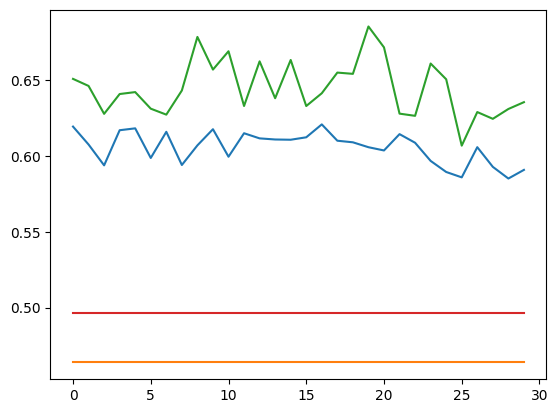

In [26]:
## Q12. Fit the model to the training data using appropriate batch size and number of epochs.
## Q13. Get the model's parameters.

EPOCHS = 30
VALIDATION_SET = (X_valid, y_valid)

history = model.fit(X_train, y_train, epochs=EPOCHS,
                    validation_data=VALIDATION_SET, batch_size=50 )

## Q17. Store the model's training history as a Pandas DataFrame.
performance=pd.DataFrame(data=history.history)

## Q15. Plot the training history (e.g., accuracy and loss) using suitable visualization techniques.
plt.plot(performance)

In [27]:
## Q19. Evaluate the model's performance using the test data.
model.evaluate(X_test,y_test)

10/10 [==============================] - 0s 2ms/step - loss: 0.6163 - accuracy: 0.4406


[0.6163032650947571, 0.44062501192092896]

# The End